In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from ipywidgets import interact

import tensorflow as tf

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0) # x0^2 + x1^2

In [3]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [4]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [5]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

In [6]:
init_x = np.array([-3.0, 4.0])

In [7]:
#x_final = gradient_descent(function_2, init_x = init_x, lr = 0.1)

In [8]:
x_final

NameError: name 'x_final' is not defined

In [9]:
learning_rate = 0.1

In [10]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

In [11]:
x_final

array([-6.11110793e-10,  8.14814391e-10])


    Expected output when lr =0.1, step_num= 100, init_x = np.array([-3.0, 4.0]):

array([-6.11110793e-10,  8.14814391e-10])

Text(0.5, 1.0, 'Learning rate = 0.1')

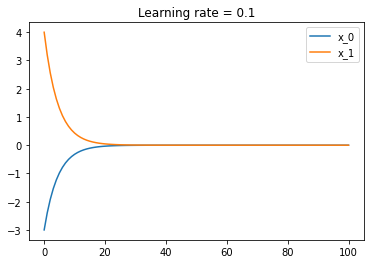

In [12]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

In [13]:
init_x, x_hist

(array([-3.,  4.]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [-2.40000000e+00,  3.20000000e+00],
        [-1.92000000e+00,  2.56000000e+00],
        [-1.53600000e+00,  2.04800000e+00],
        [-1.22880000e+00,  1.63840000e+00],
        [-9.83040000e-01,  1.31072000e+00],
        [-7.86432000e-01,  1.04857600e+00],
        [-6.29145600e-01,  8.38860800e-01],
        [-5.03316480e-01,  6.71088640e-01],
        [-4.02653184e-01,  5.36870912e-01],
        [-3.22122547e-01,  4.29496730e-01],
        [-2.57698038e-01,  3.43597384e-01],
        [-2.06158430e-01,  2.74877907e-01],
        [-1.64926744e-01,  2.19902326e-01],
        [-1.31941395e-01,  1.75921860e-01],
        [-1.05553116e-01,  1.40737488e-01],
        [-8.44424930e-02,  1.12589991e-01],
        [-6.75539944e-02,  9.00719925e-02],
        [-5.40431955e-02,  7.20575940e-02],
        [-4.32345564e-02,  5.76460752e-02],
        [-3.45876451e-02,  4.61168602e-02],
        [-2.76701161e-02,  3.68934881e-02],
        [-2.

Expected output when lr =0.1, step_num= 100, init_x = np.array([-3.0, 4.0]):

array([-6.11110793e-10,  8.14814391e-10])<hr>
TODO I: lr = 10.0 으로, lr = 0.0001 등으로 변경하여 결과를 뽑아보고 논의해봅시다.

TODO II: 3차원 공간에서의 좌표 궤적을 그려주세요 (lr = 0.001, 0.01, 0.1, 1.0, 10.0 등등)

Text(0.5, 1.0, 'Learning rate = 10')

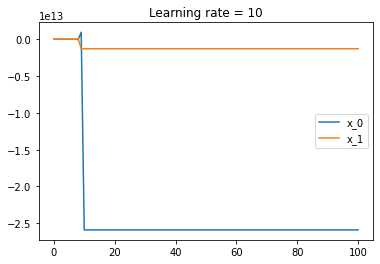

In [14]:
learning_rate = 10
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose=False)
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

Text(0.5, 1.0, 'Learning rate = 1e-06')

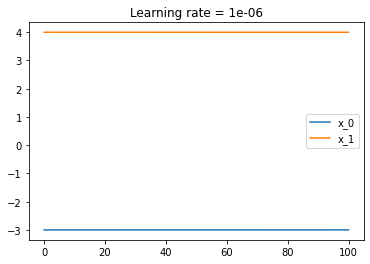

In [15]:
learning_rate = 0.000001
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose=False)
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

기울기를 별로 반영을 안해서 0에 도달하지 못한다

In [16]:
x0 = np.arange(-3, 4, 0.25) 
x1 = np.arange(-3, 4, 0.25)
X, Y = np.meshgrid(x0, x1)
print(X.shape,Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf])
print(arr)

Z = function_2(arr)
#print(Z)
Z = np.reshape(Z, (nrows,ncols))
#print(Z)

(28, 28) (28, 28)
[[-3.   -2.75 -2.5  ...  3.25  3.5   3.75]
 [-3.   -3.   -3.   ...  3.75  3.75  3.75]]


In [17]:
learning_rate = 0.1

In [18]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose=False)

In [19]:
print (x_final)
#x_hist

[-6.11110793e-10  8.14814391e-10]


In [20]:
def Rosenbrock(x,y):
    return x**2 + y**2
#x0^2 + x1^2

In [21]:
Z_hist = Rosenbrock(x_hist[:,0],x_hist[:,1])
#Z_hist = function_2(np.array(x_hist))
print(Z_hist)

[2.50000000e+01 1.60000000e+01 1.02400000e+01 6.55360000e+00
 4.19430400e+00 2.68435456e+00 1.71798692e+00 1.09951163e+00
 7.03687442e-01 4.50359963e-01 2.88230376e-01 1.84467441e-01
 1.18059162e-01 7.55578637e-02 4.83570328e-02 3.09485010e-02
 1.98070406e-02 1.26765060e-02 8.11296384e-03 5.19229686e-03
 3.32306999e-03 2.12676479e-03 1.36112947e-03 8.71122859e-04
 5.57518630e-04 3.56811923e-04 2.28359631e-04 1.46150164e-04
 9.35361048e-05 5.98631071e-05 3.83123885e-05 2.45199287e-05
 1.56927543e-05 1.00433628e-05 6.42775218e-06 4.11376139e-06
 2.63280729e-06 1.68499667e-06 1.07839787e-06 6.90174635e-07
 4.41711766e-07 2.82695530e-07 1.80925139e-07 1.15792089e-07
 7.41069371e-08 4.74284398e-08 3.03542014e-08 1.94266889e-08
 1.24330809e-08 7.95717178e-09 5.09258994e-09 3.25925756e-09
 2.08592484e-09 1.33499190e-09 8.54394814e-10 5.46812681e-10
 3.49960116e-10 2.23974474e-10 1.43343663e-10 9.17399446e-11
 5.87135646e-11 3.75766813e-11 2.40490760e-11 1.53914087e-11
 9.85050155e-12 6.304320

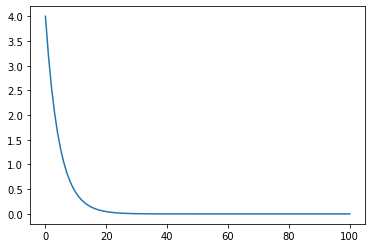

In [32]:
#plt.plot(X)
#plt.plot(Y)
#plt.plot(Z)
plt.plot(x_hist[:,1])

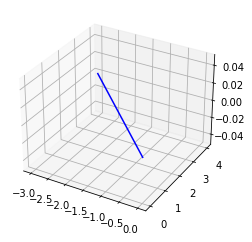

In [29]:
ax = plt.axes(projection="3d")
#plt.plot(x_hist[:,0],'r')
ax.plot(x_hist[:,0],x_hist[:,1],'b')
#plt.plot(Z_hist,'g')

In [24]:
def plot_3D(elev=40, azim=300):

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X,Y,Z)
    ax.plot(x_hist[:,0], x_hist[:,1],Z_hist,'o-',c='red')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('z')
    plt.show()
interact(plot_3D, elev=(-90, 90), azip=(-180, 180));

interactive(children=(IntSlider(value=40, description='elev', max=90, min=-90), IntSlider(value=300, descripti…

learning rate가 0.1일때 적절하게 찍힌다. 

In [48]:
learning_rate = 0.01
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose=False)
Z_hist = Rosenbrock(x_hist[:,0],x_hist[:,1])

In [49]:
interact(plot_3D, elev=(-90, 90), azip=(-180, 180));

interactive(children=(IntSlider(value=40, description='elev', max=90, min=-90), IntSlider(value=300, descripti…

lr이 0.01때는 너무 촘촘하게 나온다.

In [50]:
learning_rate = 10
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose=False)
Z_hist = Rosenbrock(x_hist[:,0],x_hist[:,1])

In [51]:
interact(plot_3D, elev=(-90, 90), azip=(-180, 180));

interactive(children=(IntSlider(value=40, description='elev', max=90, min=-90), IntSlider(value=300, descripti…

lr이 10일때 한 걸음이 너무 커서 이상하게 나온다.